In [ ]:
# imageSegmentation

## Imports

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin

# Kmeans with IRIS Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data

In [3]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

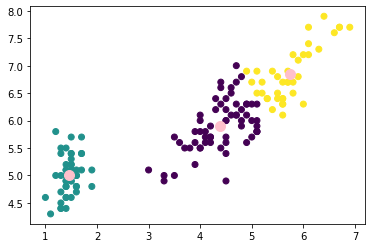

In [6]:
#Visualising the clusters
plt.scatter(X[:,2],X[:,0],c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,0], s = 100, c = 'pink', label = 'Centroids')

# Fruit Image - Image Segmentation

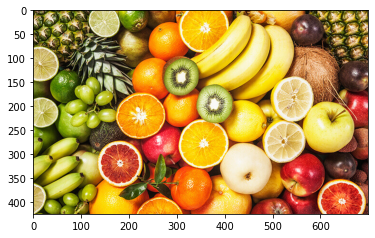

In [7]:
im = mpimg.imread("imageSegmentation.jpg")
plt.imshow(im)

In [8]:
img = mpimg.imread('imageSegmentation.jpg')
image = np.array(img, dtype=np.float64) / 255
w, h, d = original_shape = tuple(image.shape)

assert d == 3
image_array = np.reshape(image, (w*h, d))
image_array_sample = shuffle(image_array, random_state=0)[:]
kmeans = KMeans(n_clusters=6, random_state=42).fit(image_array_sample)

In [9]:
labels = kmeans.predict(image_array)
print(len(labels))

298200


In [10]:
def recreate_image(codebook, labels, w, h,z):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            if labels[label_idx]==z:                
                image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

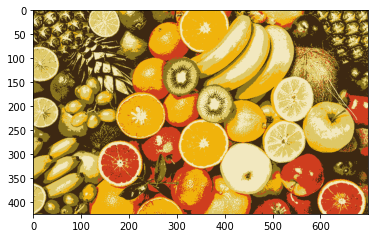

In [11]:
image = np.zeros((w, h, d))
for i in range(6):
    image += recreate_image(kmeans.cluster_centers_, labels, w, h,i)
    plt.imshow(image)

In [ ]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(image)

for i in range(10):
    
    plt.figure(i+2)
    plt.clf()
    plt.axis('off')
    plt.title('image segmentation'+ str(i+1))
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h,i))